<a href="https://colab.research.google.com/github/fernandodeeke/can2025/blob/main/secante.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> </h1>
<center><h1>Cálculo Numérico CAN0001</h1></center>
<center><h2>2025/1</h2></center>
<center><h3>Fernando Deeke Sasse</h3></center>
<center><h3>CCT - UDESC</h3></center>
<center><h2>Zeros de Funções: Método das Secantes</h2></center>

### 1. Implementação do método

Para seguir o conteúdo deste notebook é necessário que o estudante tenha aprendido previamente sobre a teoria do método das secantes na aula. Para relembrar, veja o [item da Wikipedia](https://pt.wikipedia.org/wiki/Método_das_secantes), por exemplo, ou [esta página (UFRGS)](https://www.ufrgs.br/reamat/CalculoNumerico/livro-py/sdeduv-metodo_das_secantes.html).

Inicialmente carregamos as bibliotecas imediatamente necessárias, que são a biblioteca de gráficos e a de matemática simbólica:

In [ ]:
from matplotlib.pyplot import *
from sympy import *
init_printing()

Suponhamos que queremos determinar as raízes reais da equação $-x^2-3\sin x+x+2=0$. Definimos inicialmente a variável *x* como sendo simbólica:

In [ ]:
x=symbols('x')

Podemos agora definir a função:

In [ ]:
f= Lambda(x, -x**2-3*sin(x)+x+2)
f(x)

Agora é simples avaliar a função em qualquer ponto. Por exemplo,

In [ ]:
f(0)

Façamos um gráfico desta função para localizar as raízes:

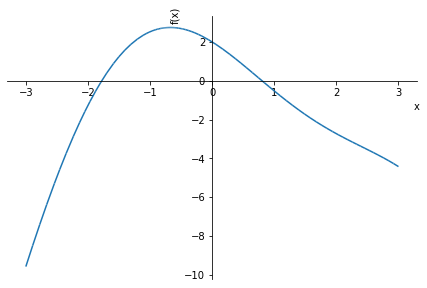

In [ ]:
plot(f(x),(x,-3,3))

Como o termo quadrático é dominante para grandes magnitudes de *x* sabemos que estas são as únicas raízes reais. O método das secantes tem a forma
$$
x_{i+2}=x_{i+1}-\frac{f(x_{i+1})}{f(x_{i+1})-f(x_i)}(x_{i+1}-x_i)\,.
$$

Dados dois pontos iniciais, digamos $x_0=1$ e $x_1=2$, podemos agora realizar uma iteração:

In [ ]:
x0=1.0
x1=2.0
x2=x1-f(x1)/(f(x1)-f(x0))*(x1-x0)
x2

Podemos repetir o processo 8 vezes:

In [ ]:
x0=1.0
x1=2.0
for i in range(1,8):
    x2=float(x1-f(x1)/(f(x1)-f(x0))*(x1-x0))
    x0=x1
    x1=x2
x2

Verifiquemos a acurácia do resultado:

In [ ]:
f(x2)

Para encontrar a outra raiz usamos como pontos iniciais $x_0=-2$ e $x_1=-1$:

In [ ]:
x0=-2.0
x1=-1.0
for i in range(1,8):
    x2=float(x1-f(x1)/(f(x1)-f(x0))*(x1-x0))
    x0=x1
    x1=x2
x2

In [ ]:
f(x2)

Podemos agora construir um procedimento em Python que tem como entrada a função, um ponto inicial e o número de iterações:

In [ ]:
def secante1(f,a,b,N):
    x0=float(a)
    x1=float(b)
    for i in range(1,N):
        x2=x1-f(x1)/(f(x1)-f(x0))*(x1-x0)
        x0=x1
        x1=x2
    return x1

In [ ]:
r1=secante1(f,1.,2.,8)
r1

In [ ]:
f(r1)

In [ ]:
r2=secante1(f,-2,-1,8)
r2

In [ ]:
f(r2)

O seguinte procedimento tem como entrada um ponto inicial, o ponto inicial $a$, o número máximo de interações *Nmax* e a tolerância para o erro $\epsilon$. Como saída temos a raiz e o número de interações realizadas:

In [ ]:
def secante3(f,a,b,Nmax, epsilon):
    erro=1
    n=0
    x0=float(a)
    x1=float(b)
    while erro>epsilon and n<Nmax:
            x2=float(x1-f(x1)/(f(x1)-f(x0))*(x1-x0))
            x0=x1
            x1=x2
            erro=abs(x1-x0)
            n=n+1
    return x1,n

In [ ]:
r1=secante3(f,1,2,20,10**(-8))
r1

Verifiquemos  a acurácia do resultado:

In [ ]:
f(r1[0])

### 2. Exercícios


<bf>1.</bf> Seja a função $f(x)=x^2+x\cos x +x-1$. <br>
(i) Faça um gráfico desta função. <br>
(ii) Determine todas as raízes reais, usando o método das secantes, com uma tolerância de intervalo $\epsilon = 10^{-10}$.<br>
(iii) Resolva o mesmo problema usando o método de Newton-Raphson e compare com o método das secantes.<br>